##Práctica 5

Paola Vargas

###Librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

###Datos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv('/content/drive/MyDrive/Procesamiento y clasificación de datos/Práctica5/Datos/ThoraricSurgery.csv')

###Análisis exploratorio

In [5]:
#Visualización de las primeras 4 observaciones del dataset
data.head(4)

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F


####Variable de respuesta

#####Se puede observar que la variable de respuesta es de tipo binario, que puede tomar los valores T y F, por lo cual el tipo de gráfico a utilizar será el de pie.

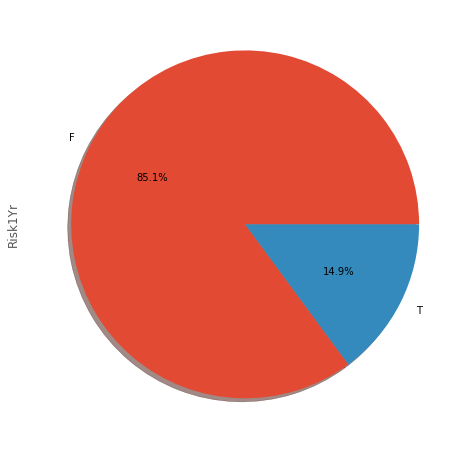

In [6]:
data['Risk1Yr'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

####Preprocesamiento de los datos

In [7]:
#Convertir variables categóricas en variables numéricas
data['PRE7']=data['PRE7'].replace(['T','F'],[1,0])
data['PRE8']=data['PRE8'].replace(['T','F'],[1,0])
data['PRE9']=data['PRE9'].replace(['T','F'],[1,0])
data['PRE10']=data['PRE10'].replace(['T','F'],[1,0])
data['PRE11']=data['PRE11'].replace(['T','F'],[1,0])
data['PRE17']=data['PRE17'].replace(['T','F'],[1,0])
data['PRE19']=data['PRE19'].replace(['T','F'],[1,0])
data['PRE25']=data['PRE25'].replace(['T','F'],[1,0])
data['PRE30']=data['PRE30'].replace(['T','F'],[1,0])
data['PRE32']=data['PRE32'].replace(['T','F'],[1,0])
data['Risk1Yr']=data['Risk1Yr'].replace(['T','F'],[1,0])

In [8]:
data.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60,0
1,2,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51,0
2,3,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59,0
3,4,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54,0
4,5,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73,1


In [9]:
# Selección de las variables por típo
# ==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector

# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.
x_data=data.drop('Risk1Yr', axis = 'columns')
x_data=x_data.drop('id',axis='columns')
numeric_cols = x_data.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = x_data.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                remainder='passthrough')

In [10]:
x_data_prep = preprocessor.fit_transform(x_data)

In [11]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
data_prep = preprocessor.transform(x_data)
data_prep = pd.DataFrame(data_prep, columns=labels)
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PRE4        470 non-null    float64
 1   PRE5        470 non-null    float64
 2   PRE7        470 non-null    float64
 3   PRE8        470 non-null    float64
 4   PRE9        470 non-null    float64
 5   PRE10       470 non-null    float64
 6   PRE11       470 non-null    float64
 7   PRE17       470 non-null    float64
 8   PRE19       470 non-null    float64
 9   PRE25       470 non-null    float64
 10  PRE30       470 non-null    float64
 11  PRE32       470 non-null    float64
 12  AGE         470 non-null    float64
 13  DGN_DGN1    470 non-null    float64
 14  DGN_DGN2    470 non-null    float64
 15  DGN_DGN3    470 non-null    float64
 16  DGN_DGN4    470 non-null    float64
 17  DGN_DGN5    470 non-null    float64
 18  DGN_DGN6    470 non-null    float64
 19  DGN_DGN8    470 non-null    f

In [12]:
#Visualización de las primeras 4 observaciones del dataset
data_prep.head()

,PRE4,PRE5,PRE7,PRE8,PRE9,PRE10,PRE11,PRE17,PRE19,PRE25,...,DGN_DGN5,DGN_DGN6,DGN_DGN8,PRE6_PRZ0,PRE6_PRZ1,PRE6_PRZ2,PRE14_OC11,PRE14_OC12,PRE14_OC13,PRE14_OC14
0,0.296296,0.014061,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.403292,0.010780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.271605,0.013124,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.460905,0.024373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.205761,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [13]:
#Agregar variable independiente
data['Risk1Yr']=data['Risk1Yr'].astype(float)
data_prep['Risk1Yr']=data['Risk1Yr']
data_prep.head()

,PRE4,PRE5,PRE7,PRE8,PRE9,PRE10,PRE11,PRE17,PRE19,PRE25,...,DGN_DGN6,DGN_DGN8,PRE6_PRZ0,PRE6_PRZ1,PRE6_PRZ2,PRE14_OC11,PRE14_OC12,PRE14_OC13,PRE14_OC14,Risk1Yr
0,0.296296,0.014061,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.403292,0.010780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.271605,0.013124,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.460905,0.024373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.205761,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [14]:
#Dividir el dataset en variables dependientes e independientes:
X= data_prep[labels] #Características
y= data_prep.Risk1Yr #Variable independiente

In [15]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 5.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [16]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


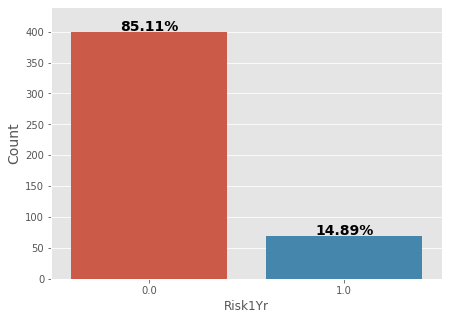

In [17]:

total = len(data_prep)
plt.figure(figsize=(7,5))
g = sns.countplot(x='Risk1Yr', data=data_prep)
g.set_ylabel('Count', fontsize=14)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 1.5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14, fontweight='bold')
plt.margins(y=0.1)
plt.show()

In [18]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X1, y1 = oversample.fit_resample(X, y)

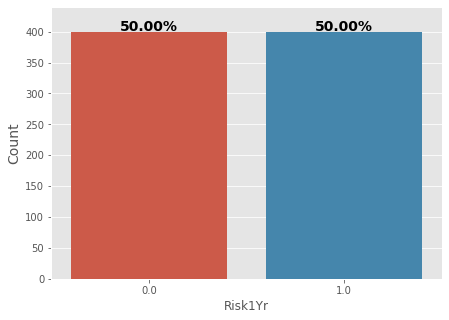

In [19]:
df1 = pd.DataFrame(X1, columns=labels)
df1['Risk1Yr'] = y1

total = len(df1)
plt.figure(figsize=(7,5))
g = sns.countplot(x='Risk1Yr', data=df1)
g.set_ylabel('Count', fontsize=14)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 1.5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14, fontweight='bold')
plt.margins(y=0.1)
plt.show()

In [20]:
# Dimensiones del dataset
# ==============================================================================
df1.shape

(800, 28)

In [30]:
#Dividir el dataset en grupos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

####Modelos de aprendizaje automático

##### Regresión Logística usando datos balanceados mediante SMOTE

In [31]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [32]:
#Evaluación del modelo
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.65


In [33]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[63, 31],
       [39, 67]])

Text(0.5, 257.44, 'Predicted label')

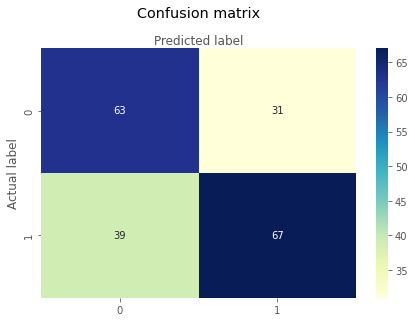

In [34]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
from sklearn.metrics import classification_report
target_names = ['False', 'True']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       0.62      0.67      0.64        94
        True       0.68      0.63      0.66       106

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.65      0.65      0.65       200



#####Regresión Logística usando conjunto desbalabnceado

In [48]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=16)

In [49]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train1, y_train1)

y_pred1 = logreg.predict(X_test1)

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8898305084745762


In [51]:
cnf_matrix = metrics.confusion_matrix(y_test1, y_pred1)
cnf_matrix

array([[103,   2],
       [ 11,   2]])

Text(0.5, 257.44, 'Predicted label')

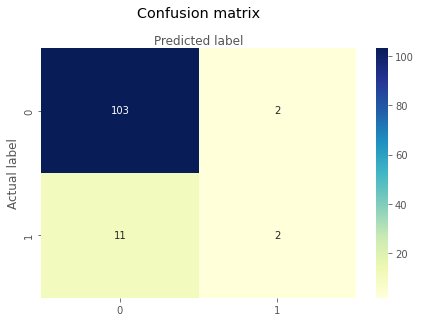

In [52]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
target_names = ['False', 'True']
print(classification_report(y_test1, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

       False       0.90      0.98      0.94       105
        True       0.50      0.15      0.24        13

    accuracy                           0.89       118
   macro avg       0.70      0.57      0.59       118
weighted avg       0.86      0.89      0.86       118



**Conclusiones**:

Se logra apreciar que aunque se tiene un accuracy mayor al correr el modelo con los datos desbalanceados, éste está clasificando con menor precisión a la clase minoritaria (que es la de nuestro interés), por lo que el modelo que nos conviene utilizar es el que contiene los datos balanceados con la técnica SMOTE, pues nos da una precisión buena (65%) y clasifica de mejor manera la clase "Verdadera" (pacientes que no sobreviven más de un año después de someterse a una cirugía torácica).